Завдання:
Провести дослідницький аналіз запропонованих даних. Аналіз, як мінімум, повинен включати:
Первинний аналіз даних: к-сть даних та кількість змінних, типи дани вхідних та вихідної змінної.
Однозмінний аналіз (univariate EDA):
Для числових змінних: оцінити параметри дескриптивної статистики  [API: 1], розподіл, наявність статистичних викидів та пропущених даних  [API: 2] (аналіз вихідної змінної провести окремо);
(для СА-33) Для змінних з “сильно” асиметричним розподілом підібрати нелінійне перетворення для нормалізації розподілу;
Для категоріальних змінних: оцінити розподіл та баланс категорій, кількість пропущених даних  [API: 4];
За потреби провести додатковий аналіз на сумісність, обмеження та/або коректність  змінних;
Двозмінній/багатозмінний аналіз (bivariate/multivariate EDA)
Побудувати матрицю кореляції між числовими змінними (в тому числі з вихідною), зробити висновки [API: 5].
Для пар змінних з високою кореляцією побудувати візуальне подання залежності [API: 6].
(для СА-33) Оцінити mutual information score (MI) між вихідною змінною та числовими вхідними, отримані значення подати у вигляді відсортованого barplot [API: 7]. Порівняти MI оцінку з раніше отриманими коефіцієнтами кореляції.
Оцінити розподіл та статистичні викиди вихідної змінної залежно від значень (кожної з) категоріальних змінних  [API: 3];
(для СА-33) Провести статистичні тести (t-тест чи ANOVA чи H-тест) для оцінки значущості різниці значення вихідної змінної залежно від значення категоріальної змінної (додати p-значення на діаграму).
(для СА-33) Для обраної пари категоріальних змінних побудувати 2D розподіл, на її базі побудувати гіпотезу та протестувати її за χ² тестом.
Зробити висновки на базі проведеного аналізу
/


Model
4WD/4X4 = Four-wheel drive
AWD = All-wheel drive
FFV = Flexible-fuel vehicle
SWB = Short wheelbase
LWB = Long wheelbase
EWB = Extended wheelbase

Transmission
A = Automatic
AM = Automated manual
AS = Automatic with select shift
AV = Continuously variable
M = Manual
3 - 10 = Number of gears

Fuel type
X = Regular gasoline
Z = Premium gasoline
D = Diesel
E = Ethanol (E85)
N = Natural gas

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('CO2 Emissions_Canada.csv')

In [4]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

Для числових змінних: оцінити параметри дескриптивної статистики  [API: 1], розподіл, наявність статистичних викидів та пропущених даних  [API: 2] (аналіз вихідної змінної провести окремо);


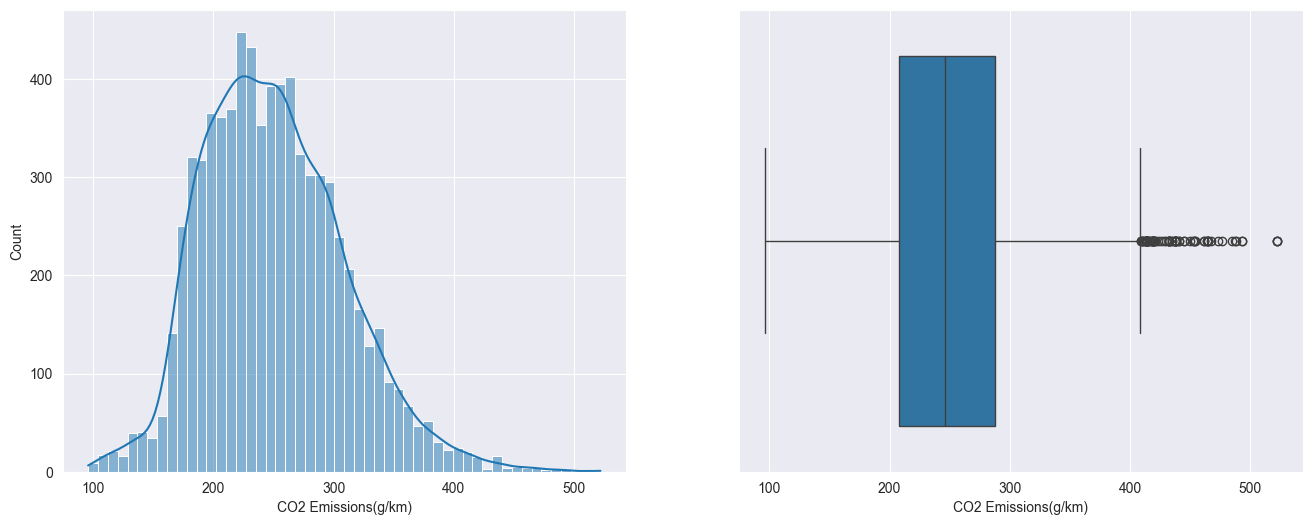

In [7]:
f , axs = plt.subplots(1,2, figsize=(16,6))
sns.histplot(data=df, x='CO2 Emissions(g/km)',kde=True, ax = axs[0])
sns.boxplot(data=df, x='CO2 Emissions(g/km)', ax= axs[1])
plt.show()

Ну розподіл майже нормальний, трохи зміщенний в ліво, 

в боксплоті можна побачити викиди,

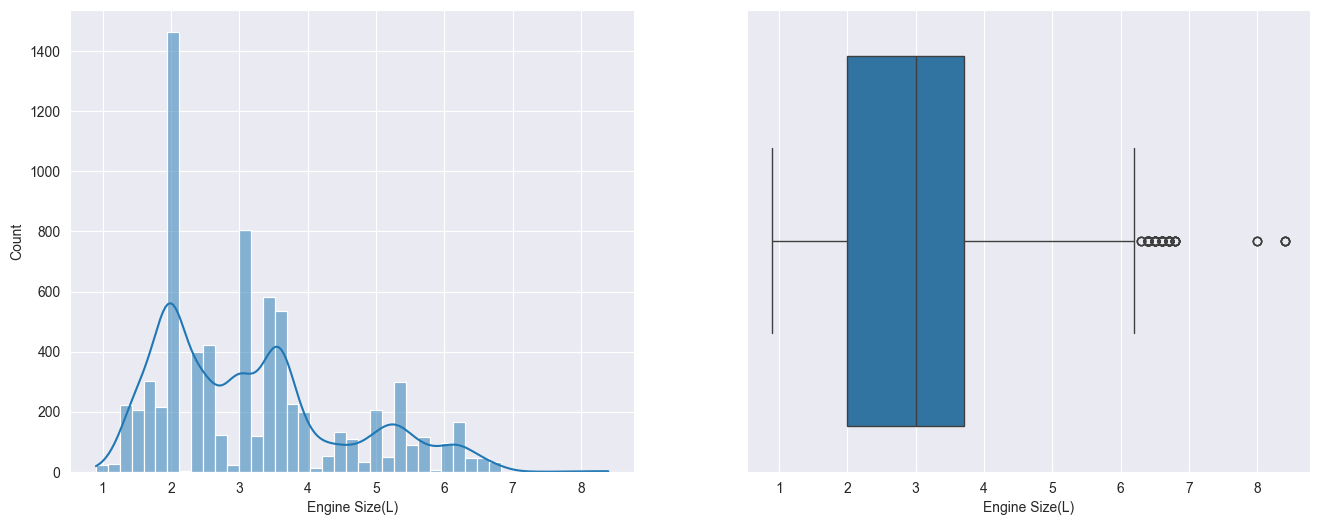

In [8]:
f , axs = plt.subplots(1,2, figsize=(16,6))
sns.histplot(data=df, x='Engine Size(L)',kde=True, ax = axs[0])
sns.boxplot(data=df, x='Engine Size(L)', ax= axs[1])
plt.show()

Розподіл не є нормальним, має хвіст в праву сторону

Є викиди

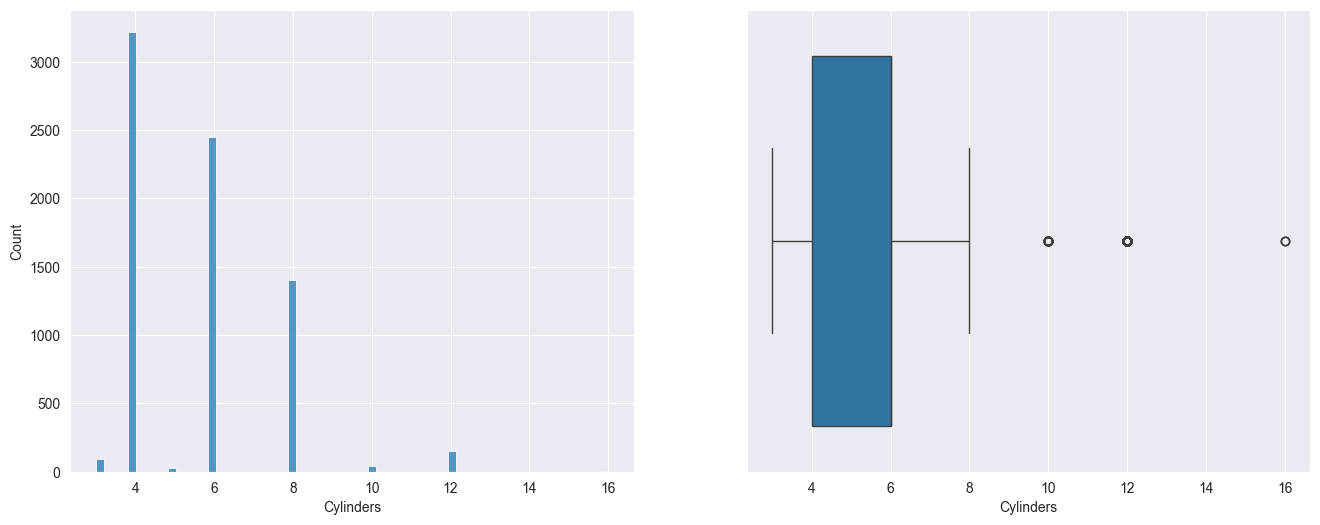

In [9]:
f , axs = plt.subplots(1,2, figsize=(16,6))
sns.histplot(data=df, x='Cylinders', ax = axs[0])
sns.boxplot(data=df, x='Cylinders', ax= axs[1])
plt.show()

Розподіл є бінарним

Є незначний викид

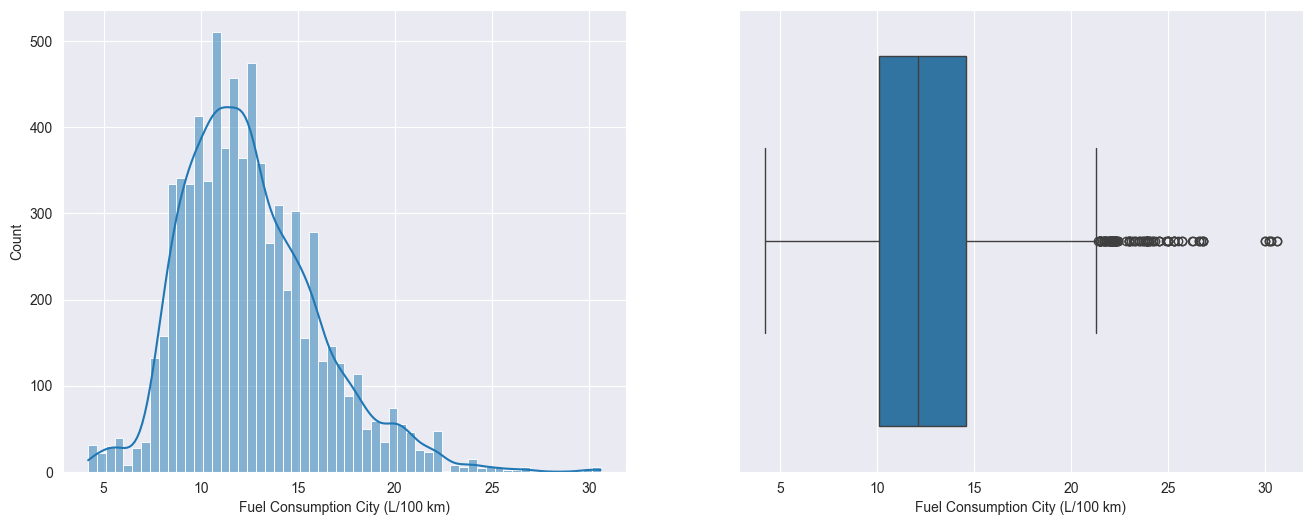

In [10]:
f , axs = plt.subplots(1,2, figsize=(16,6))
sns.histplot(data=df, x='Fuel Consumption City (L/100 km)',kde=True, ax = axs[0])
sns.boxplot(data=df, x='Fuel Consumption City (L/100 km)', ax= axs[1])
plt.show()

Розподіл є близьким до нормального, довгий правий хвіст

Є багато викидів

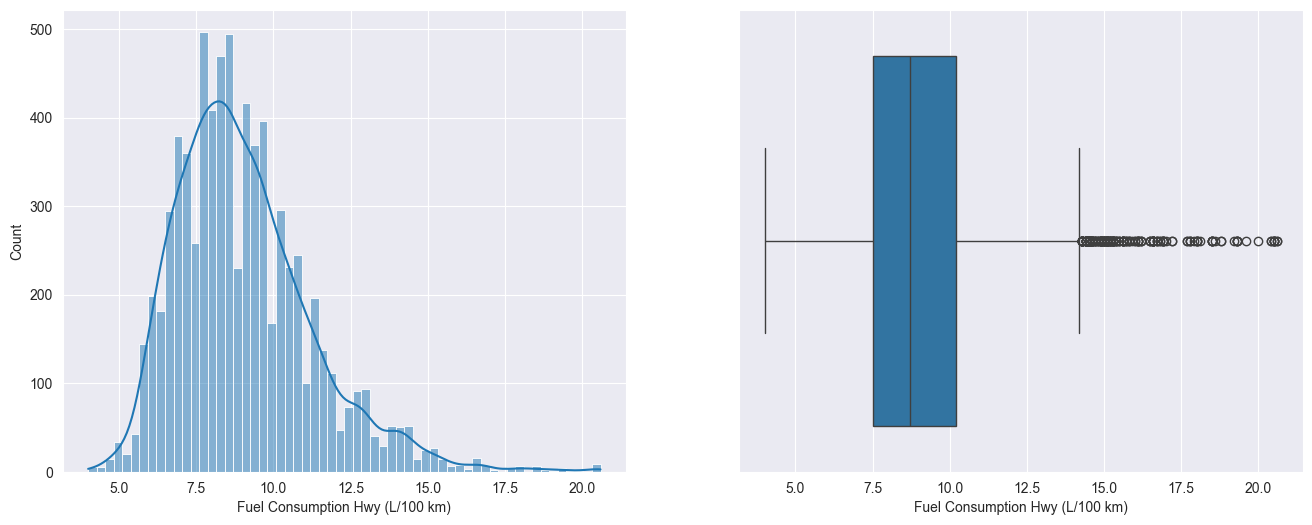

In [11]:
f , axs = plt.subplots(1,2, figsize=(16,6))
sns.histplot(data=df, x='Fuel Consumption Hwy (L/100 km)',kde=True, ax = axs[0])
sns.boxplot(data=df, x='Fuel Consumption Hwy (L/100 km)', ax= axs[1])
plt.show()

Розподіл є близьким до нормального, довгий правий хвіст

Є багато викидів

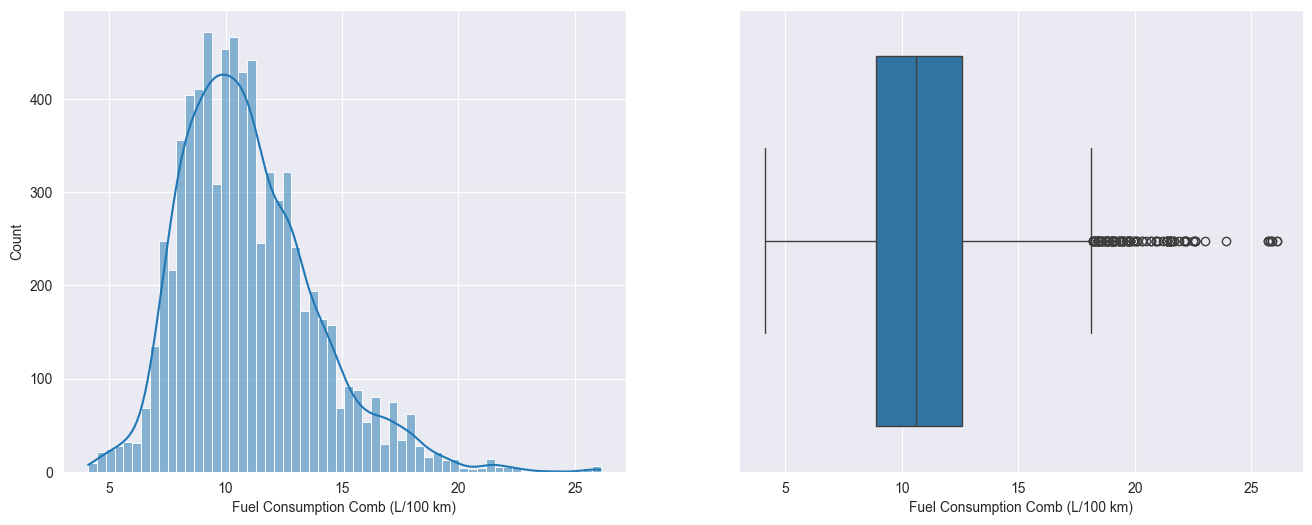

In [12]:
f , axs = plt.subplots(1,2, figsize=(16,6))
sns.histplot(data=df, x='Fuel Consumption Comb (L/100 km)',kde=True, ax = axs[0])
sns.boxplot(data=df, x='Fuel Consumption Comb (L/100 km)', ax= axs[1])
plt.show()

Розподіл є близьким до нормального, довгий правий хвіст

Є багато викидів

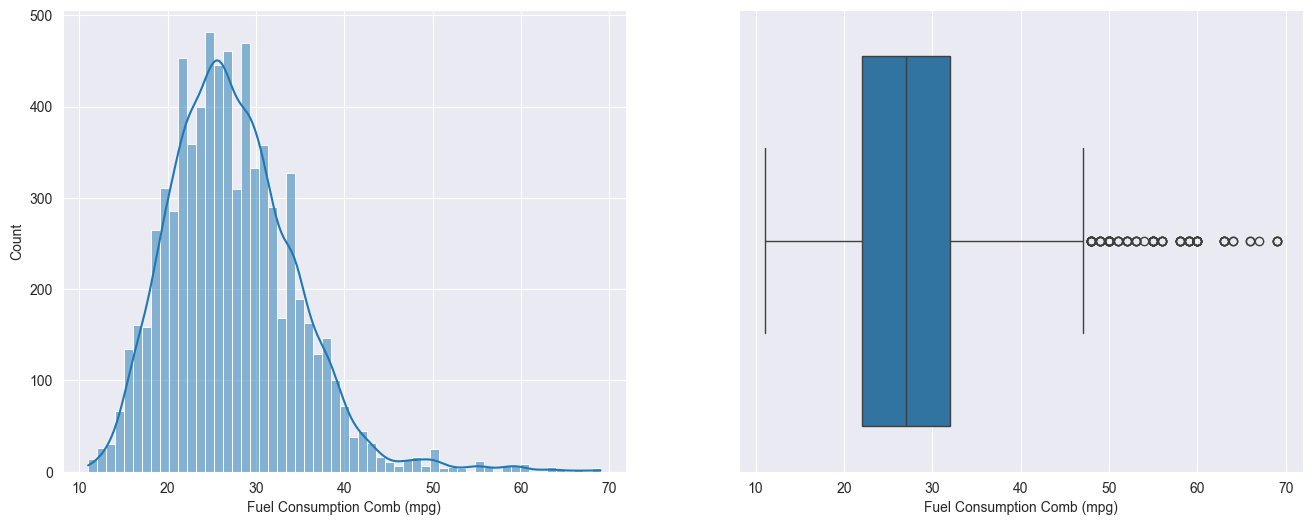

In [13]:
f , axs = plt.subplots(1,2, figsize=(16,6))
sns.histplot(data=df, x='Fuel Consumption Comb (mpg)',kde=True, ax = axs[0])
sns.boxplot(data=df, x='Fuel Consumption Comb (mpg)', ax= axs[1])
plt.show()

Розподіл є близьким до нормального, довгий правий хвіст

Є багато викидів

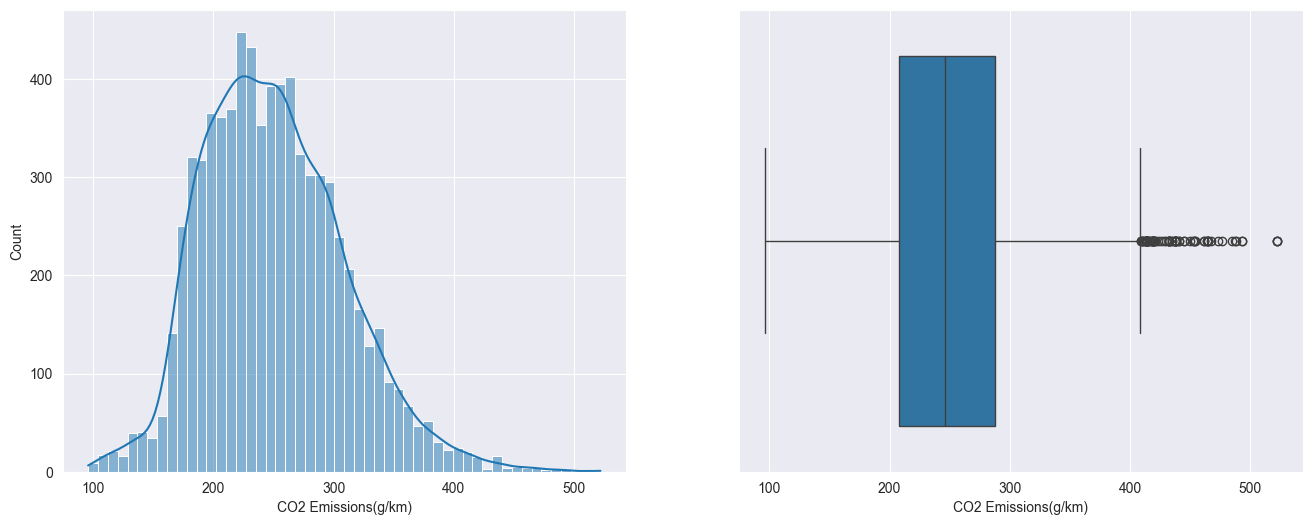

In [14]:
f , axs = plt.subplots(1,2, figsize=(16,6))
sns.histplot(data=df, x='CO2 Emissions(g/km)',kde=True, ax = axs[0])
sns.boxplot(data=df, x='CO2 Emissions(g/km)', ax= axs[1])
plt.show()

Розподіл є близьким до нормального, несильно довгий правий хвіст

Є багато викидів

# Категоріальні змінні

 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
  5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 

In [15]:
df['Make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [16]:
df['Make'].nunique()

42

In [17]:
df['Make'].value_counts()

Make
FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: count, dtype: int64

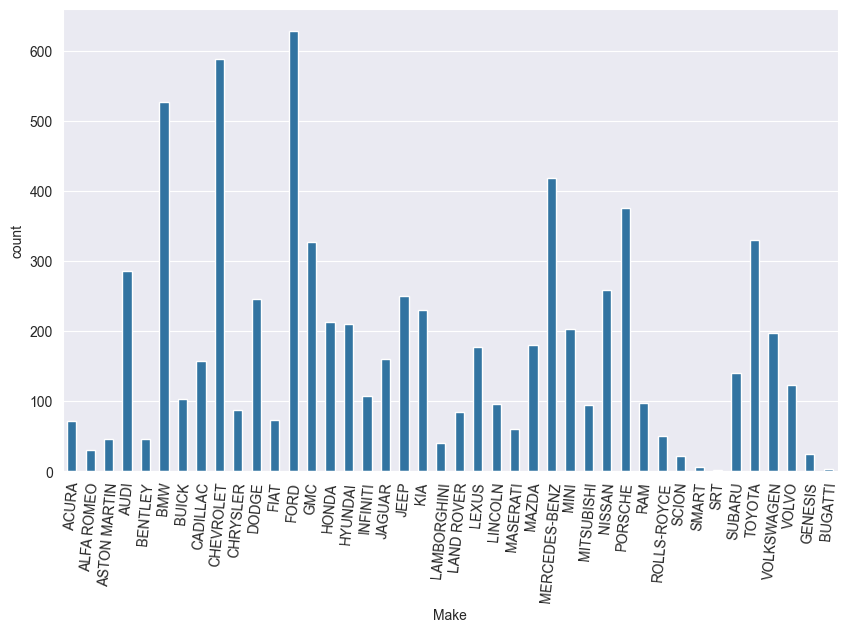

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Make', data=df, width=0.5)
plt.xticks(rotation=85) 
plt.show()

In [19]:
df['Model'].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

In [20]:
df['Model'].nunique()

2053

In [21]:
df['Model'].value_counts()

Model
F-150 FFV 4X4           32
F-150 FFV               32
MUSTANG                 27
FOCUS FFV               24
SONIC                   20
                        ..
AVENTADOR S ROADSTER     1
HURACAN AWD              1
HURACAN SPYDER AWD       1
LS 500                   1
XC40 T4 AWD              1
Name: count, Length: 2053, dtype: int64

In [22]:
df['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [23]:
df['Vehicle Class'].nunique()

16

In [24]:
df['Vehicle Class'].value_counts()

Vehicle Class
SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: count, dtype: int64

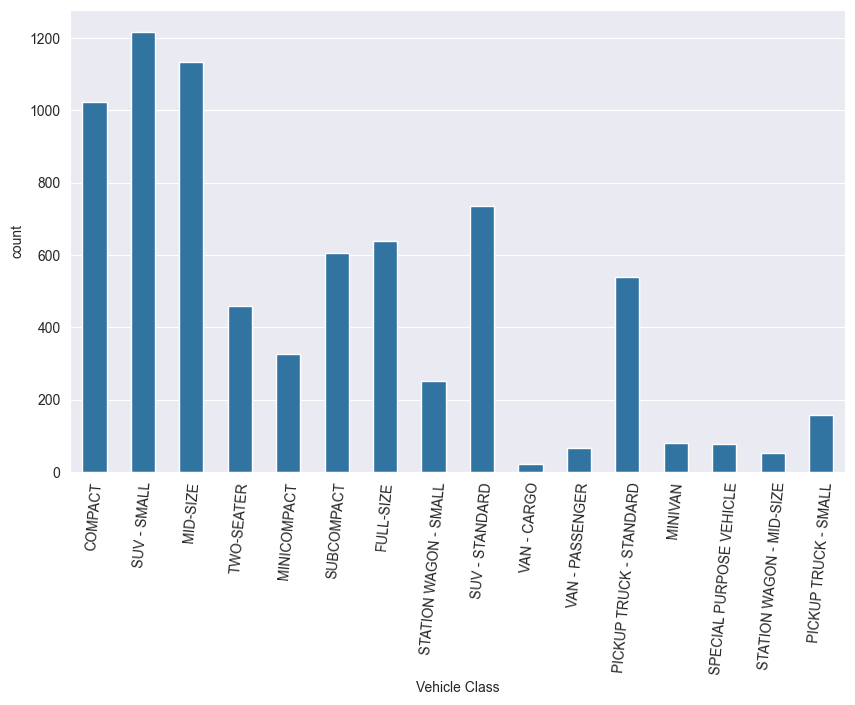

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle Class', data=df, width=0.5)
plt.xticks(rotation=85) 
plt.show()

In [26]:
df['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [27]:
df['Transmission'].nunique()

27

In [28]:
df['Transmission'].value_counts()

Transmission
AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: count, dtype: int64

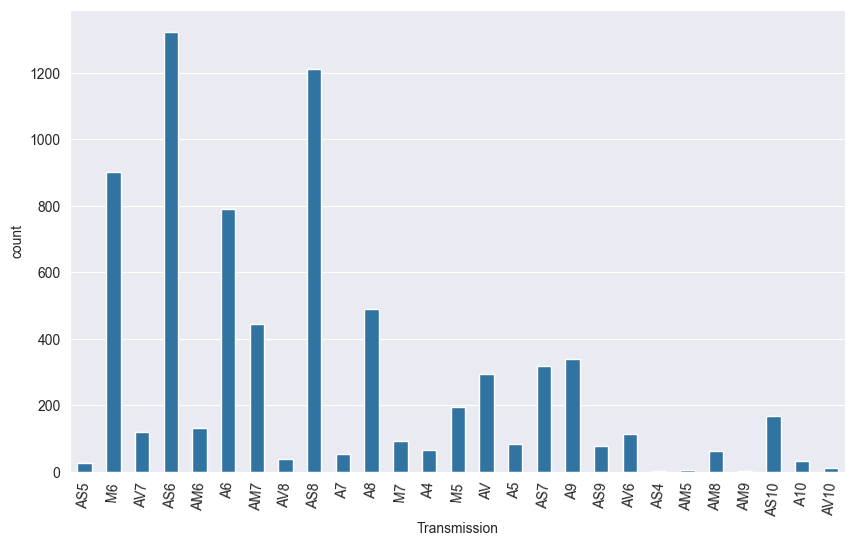

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Transmission', data=df, width=0.5)
plt.xticks(rotation=85) 
plt.show()

In [30]:
df['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [31]:
df['Fuel Type'].nunique()

5

In [32]:
df['Fuel Type'].value_counts()

Fuel Type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64

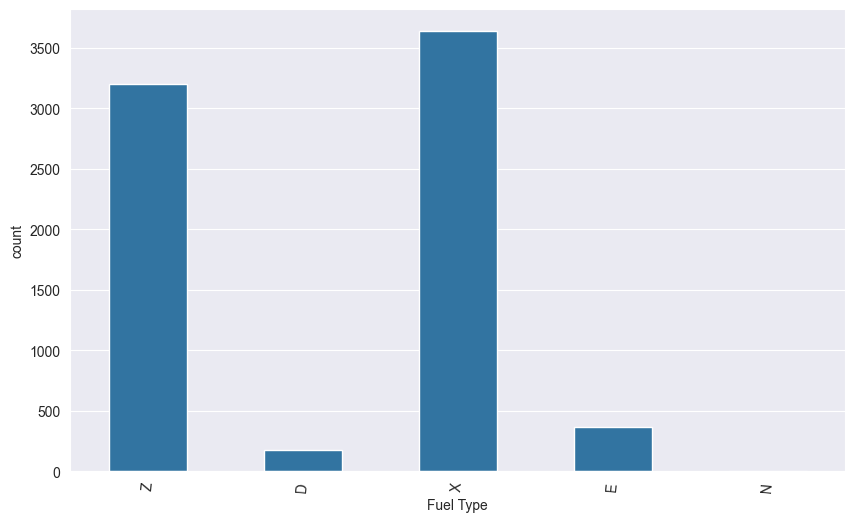

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel Type', data=df, width=0.5)
plt.xticks(rotation=85) 
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

# Двозмінній/багатозмінний аналіз (bivariate/multivariate EDA)
Побудувати матрицю кореляції між числовими змінними (в тому числі з вихідною), зробити висновки [API: 5].
Для пар змінних з високою кореляцією побудувати візуальне подання залежності [API: 6].
(для СА-33) Оцінити mutual information score (MI) між вихідною змінною та числовими вхідними, отримані значення подати у вигляді відсортованого barplot [API: 7]. Порівняти MI оцінку з раніше отриманими коефіцієнтами кореляції.
Оцінити розподіл та статистичні викиди вихідної змінної залежно від значень (кожної з) категоріальних змінних  [API: 3];
(для СА-33) Провести статистичні тести (t-тест чи ANOVA чи H-тест) для оцінки значущості різниці значення вихідної змінної залежно від значення категоріальної змінної (додати p-значення на діаграму).
(для СА-33) Для обраної пари категоріальних змінних побудувати 2D розподіл, на її базі побудувати гіпотезу та протестувати її за χ² тестом.

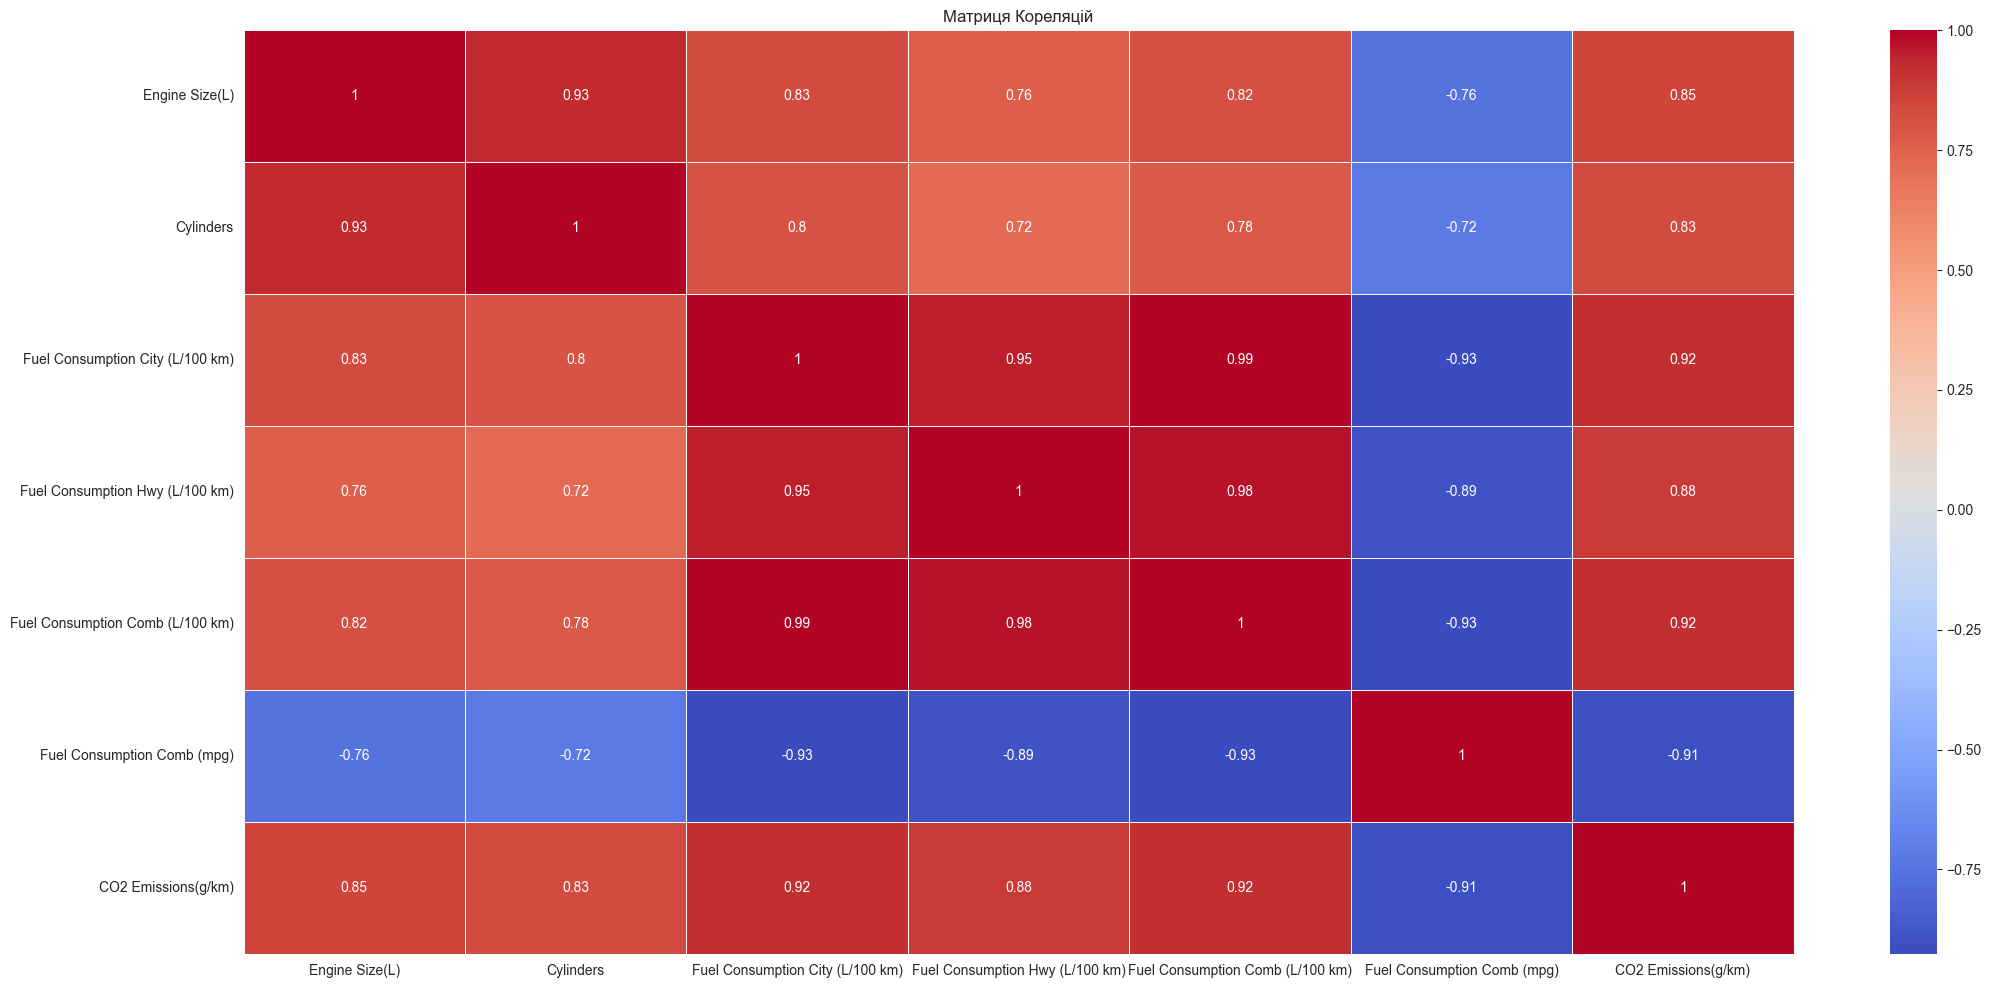

In [35]:
corr = df.select_dtypes(include=['float', 'int'])
corrplot = corr.corr()
plt.figure(figsize=(25, 12))
sns.heatmap(corrplot, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Матриця Кореляцій')
plt.show()

Найбільш наближеними є Engine Size(L) - Cylinders
Fuel Consumption City (L/100 km) - Fuel Consumption Comb (L/100 km)
Fuel Consumption City (L/100 km) - Fuel Consumption Hwy (L/100 km)
Fuel Consumption Comb (L/100 km) - Fuel Consumption Hwy (L/100 km)
Fuel Consumption City (L/100 km) - CO2 Emissions(g/km)  
Fuel Consumption Comb (L/100 km) - CO2 Emissions(g/km)  

<Figure size 1400x600 with 0 Axes>

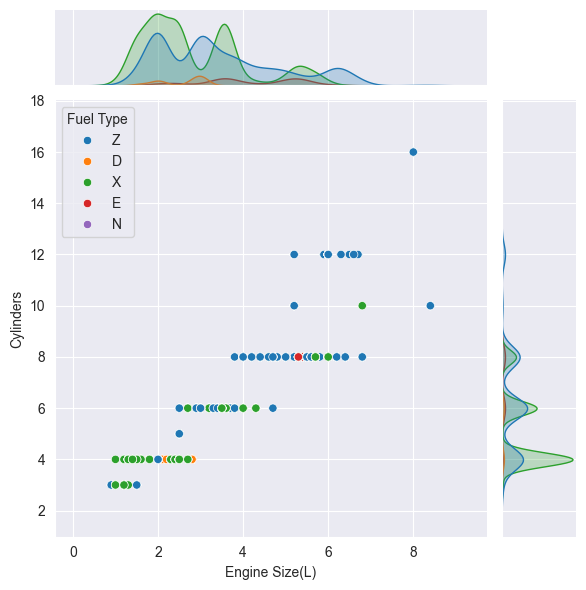

In [73]:
plt.figure(figsize=(14, 6))
sns.jointplot(data=df, x='Engine Size(L)', y='Cylinders', hue='Fuel Type')
plt.show()

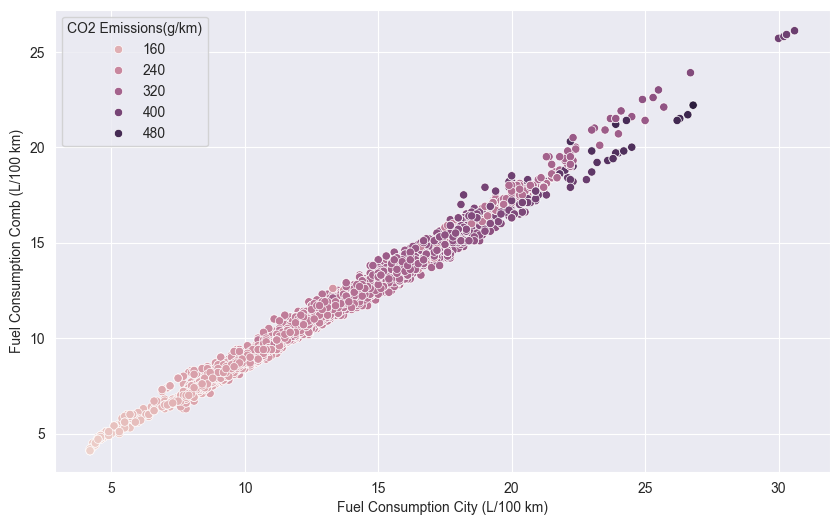

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Fuel Consumption City (L/100 km)', y='Fuel Consumption Comb (L/100 km)', hue='CO2 Emissions(g/km)')
plt.show()

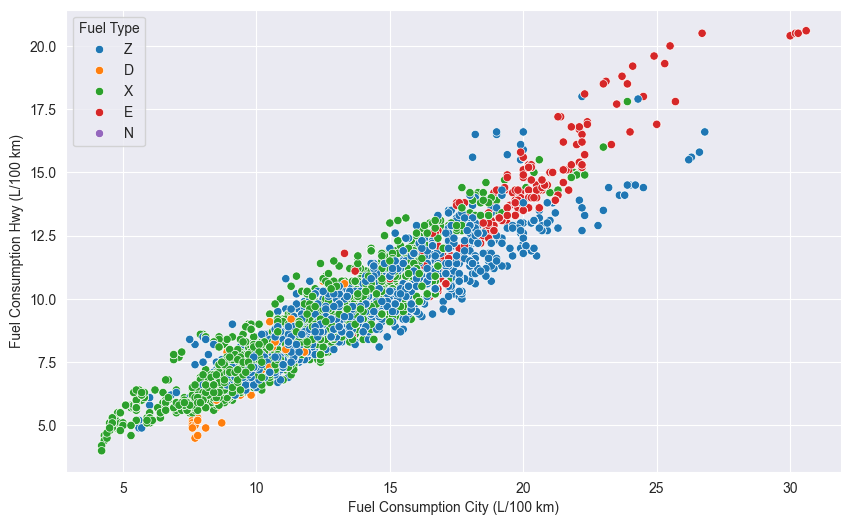

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Fuel Consumption City (L/100 km)', y='Fuel Consumption Hwy (L/100 km)', hue='Fuel Type')
plt.show()

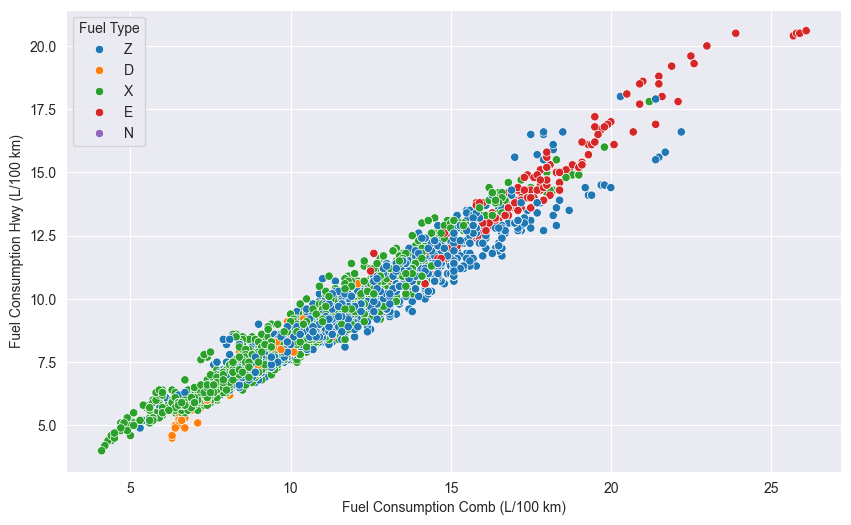

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Fuel Consumption Comb (L/100 km)', y='Fuel Consumption Hwy (L/100 km)', hue='Fuel Type')
plt.show()

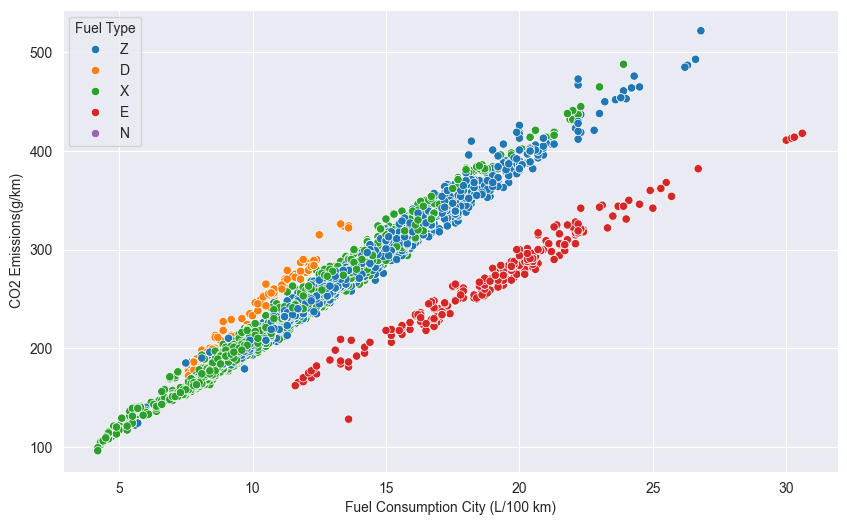

In [59]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Fuel Consumption City (L/100 km)', y='CO2 Emissions(g/km)', hue="Fuel Type")
plt.show()

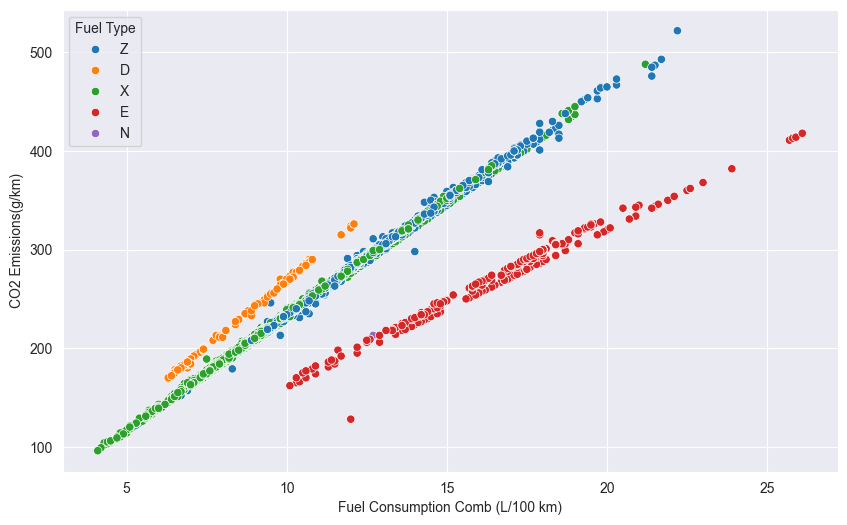

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', hue="Fuel Type")
plt.show()

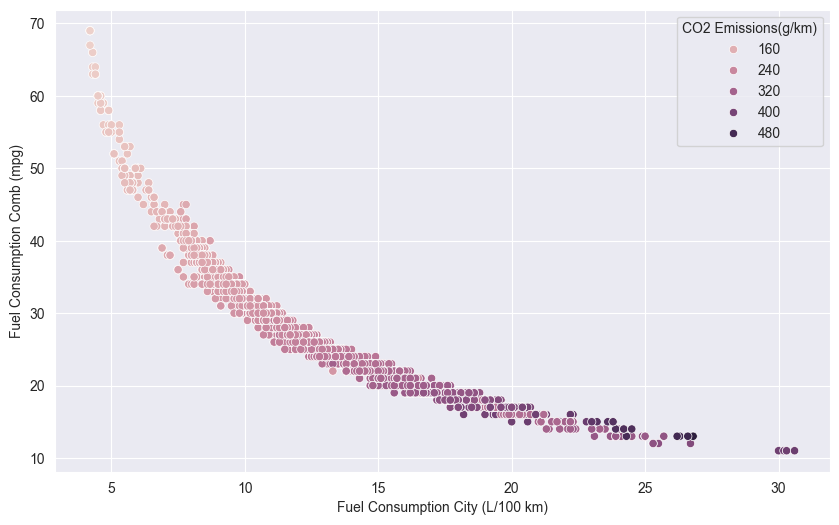

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Fuel Consumption City (L/100 km)', y='Fuel Consumption Comb (mpg)', hue='CO2 Emissions(g/km)')
plt.show()

mutual information score

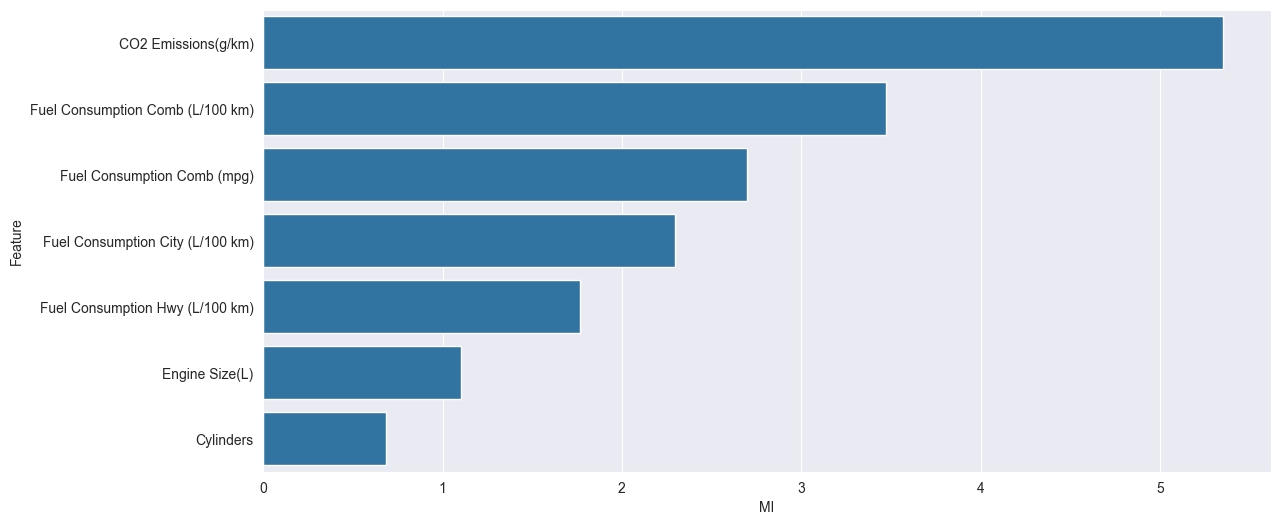

In [89]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(df.select_dtypes(include=['float', 'int']), df['CO2 Emissions(g/km)'])

dfMI = pd.DataFrame({'Feature': df.select_dtypes(include=['float', 'int']).columns, 'MI': mi})
dfMI  = dfMI.sort_values(by='MI', ascending=False)

plt.figure(figsize=(13, 6))
sns.barplot(x='MI', y='Feature', data=dfMI)
plt.show()


Оцінити розподіл та статистичні викиди вихідної змінної залежно від значень (кожної з) категоріальних змінних 

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

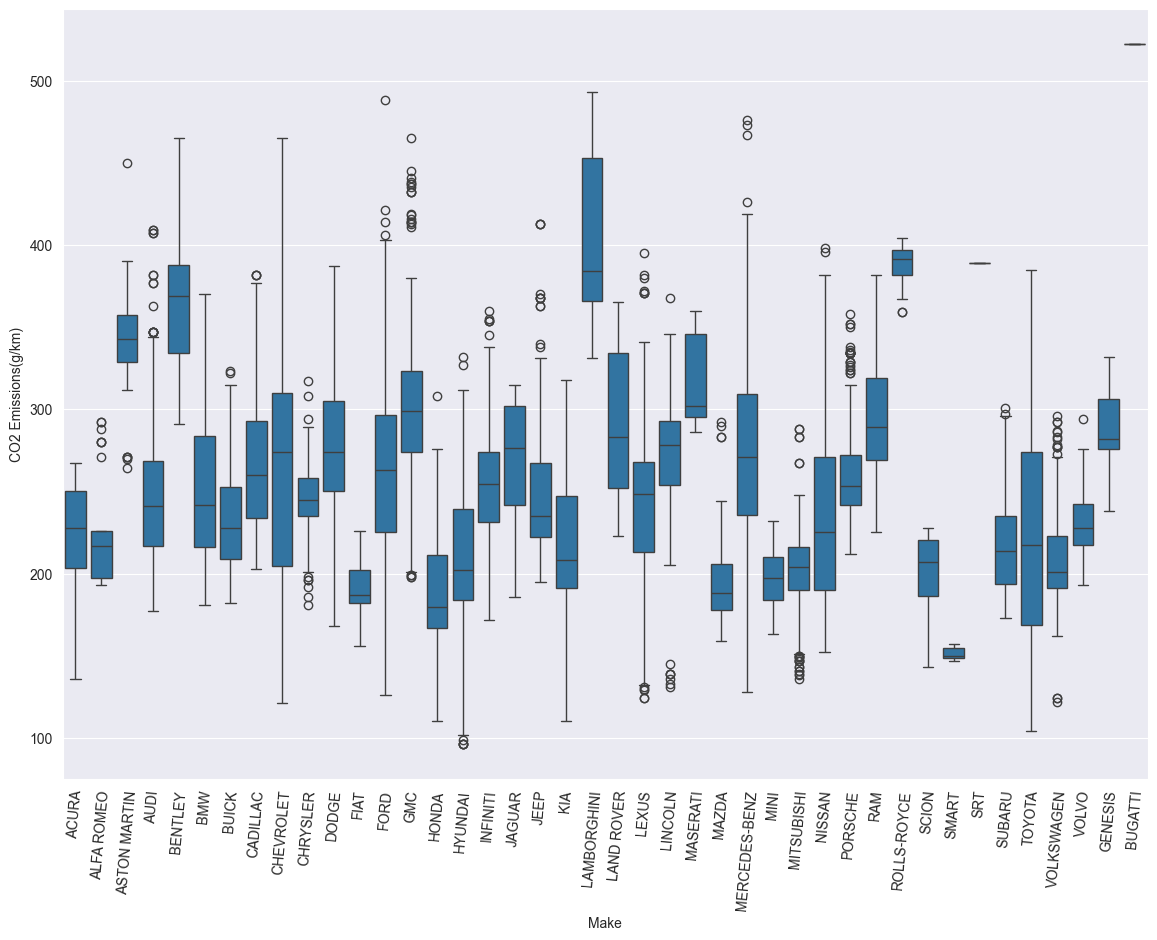

In [45]:
plt.figure(figsize=(14, 10))
sns.boxplot(data=df, x='Make', y='CO2 Emissions(g/km)')
plt.xticks(rotation=85)
plt.show()

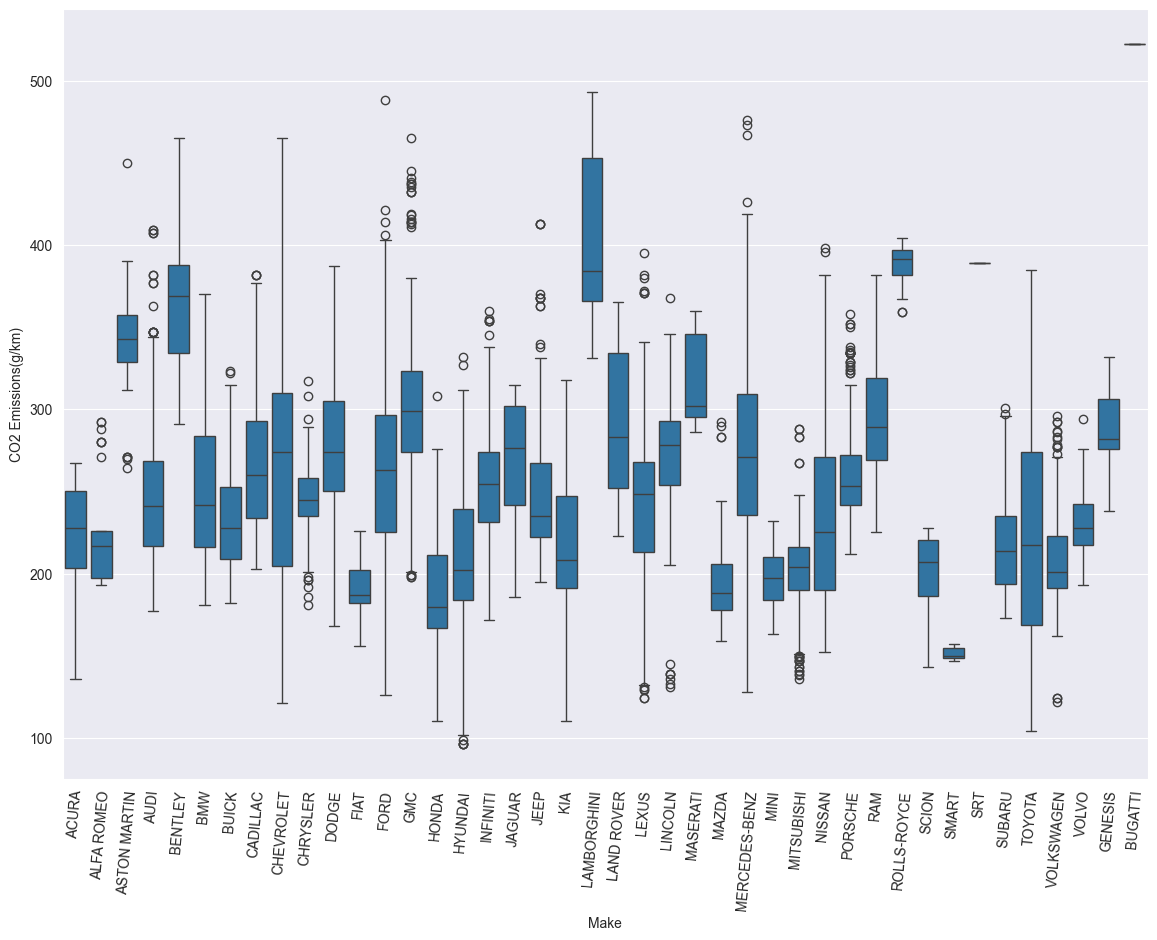

In [46]:
plt.figure(figsize=(14,10))
sns.boxplot(data=df, x='Make', y='CO2 Emissions(g/km)')
plt.xticks(rotation=85) 
plt.show()

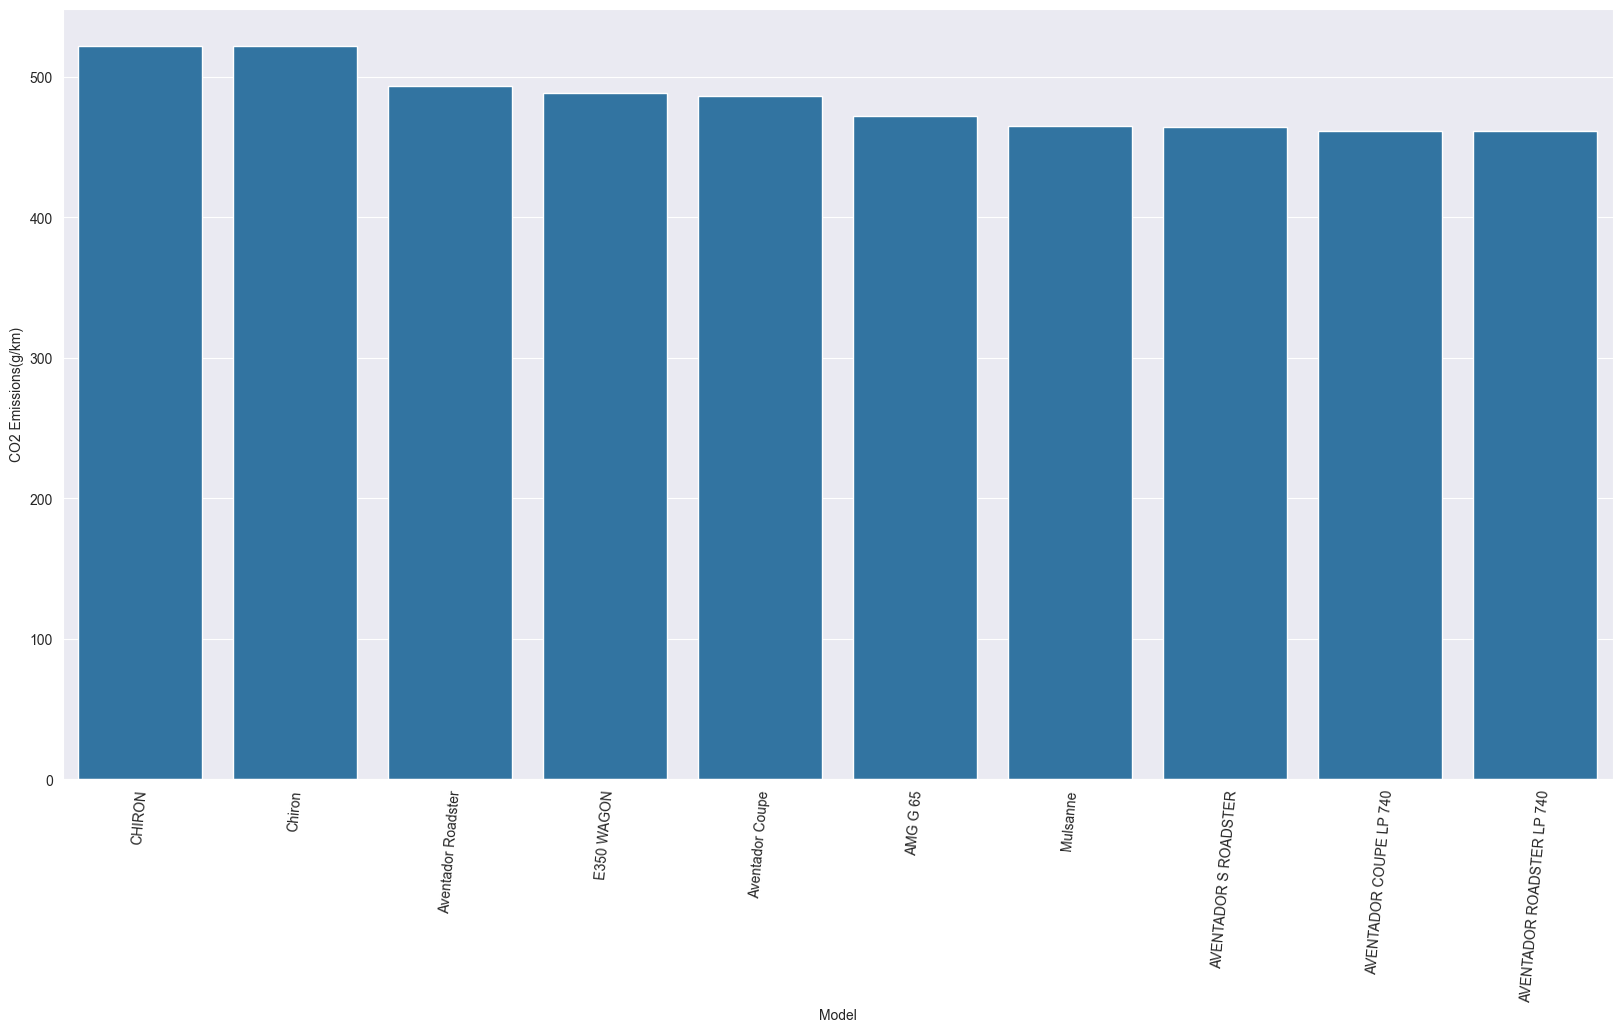

In [79]:
top10 = df.groupby(['Model'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index().nlargest(10,'CO2 Emissions(g/km)')

plt.figure(figsize=(20,10))
sns.barplot(data=top10, x='Model', y='CO2 Emissions(g/km)')
plt.xticks(rotation=85) 
plt.show()

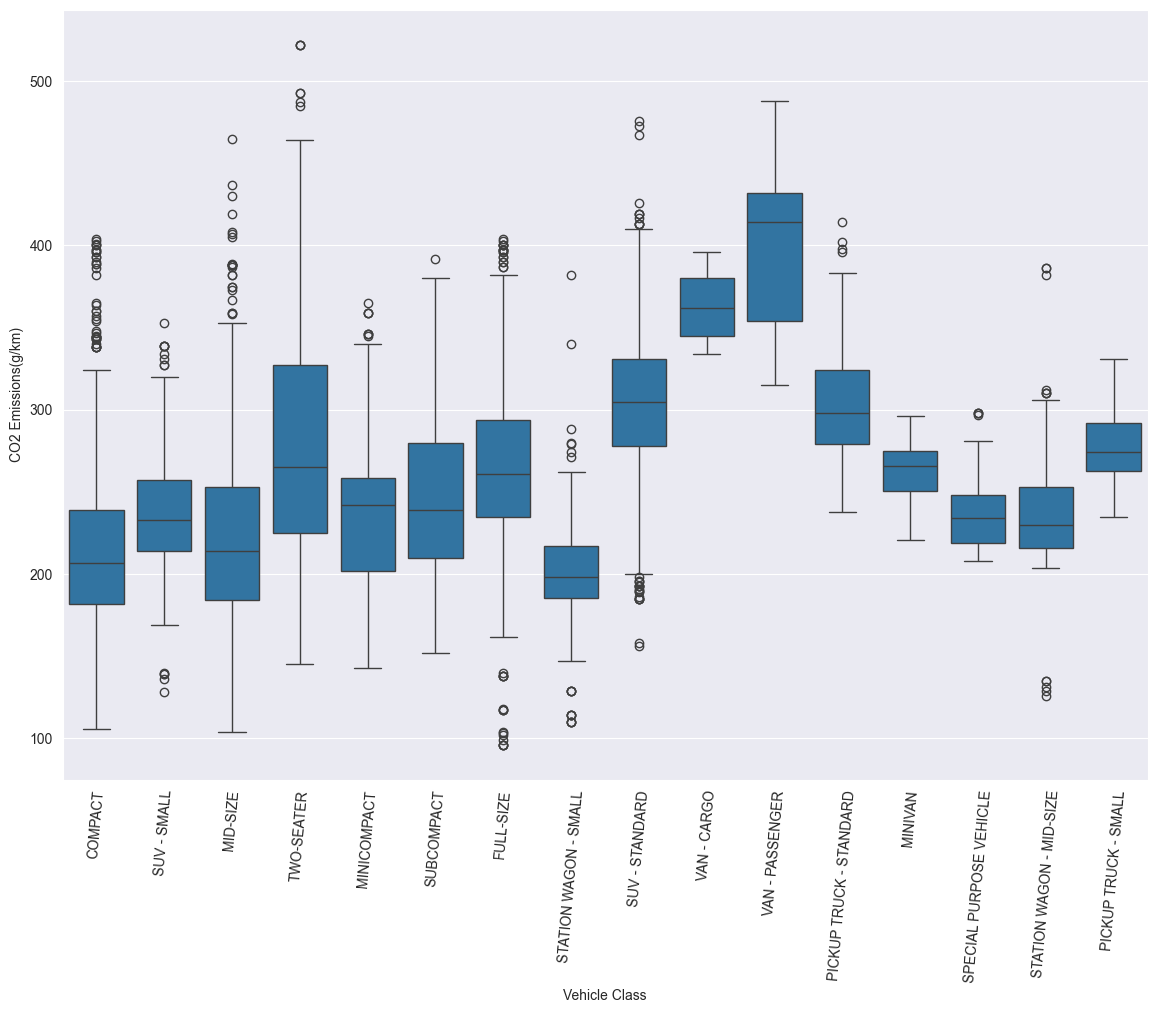

In [48]:
plt.figure(figsize=(14,10))
sns.boxplot(data=df, x='Vehicle Class', y='CO2 Emissions(g/km)')
plt.xticks(rotation=85) 
plt.show()

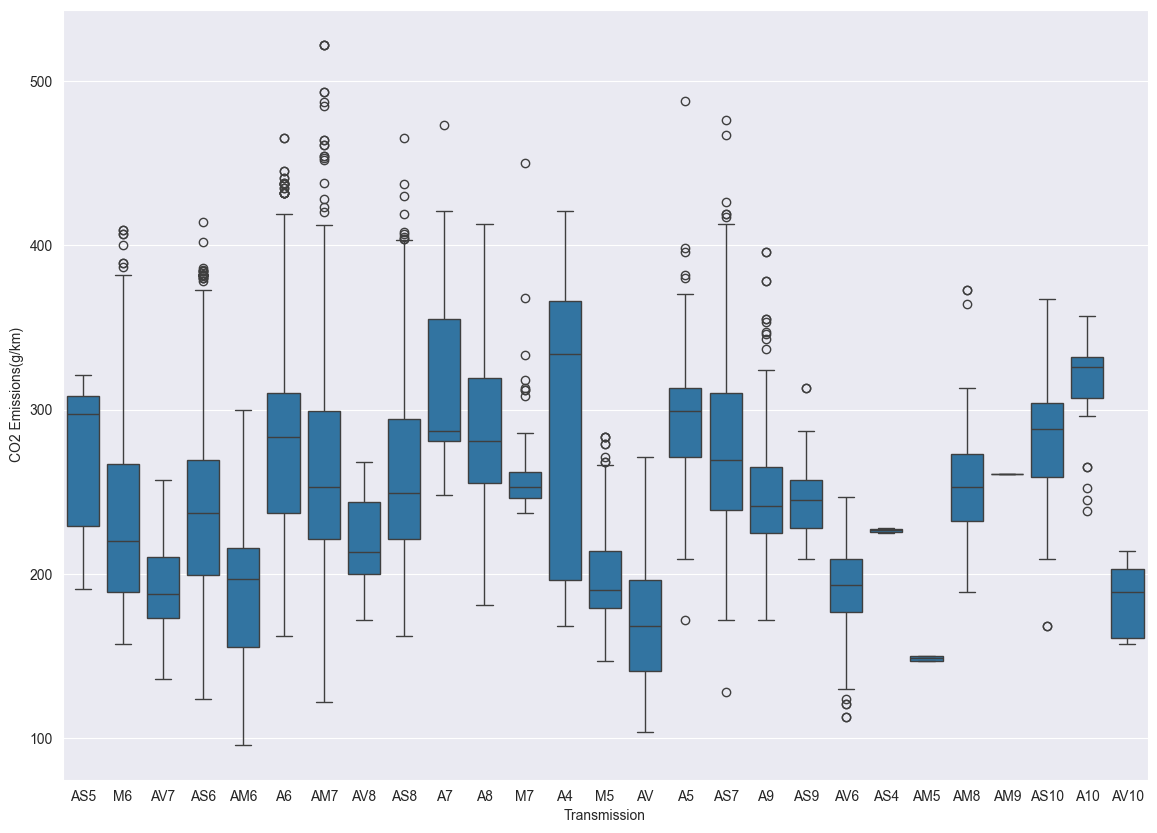

In [49]:
plt.figure(figsize=(14,10))
sns.boxplot(data=df, x='Transmission', y='CO2 Emissions(g/km)')
plt.show()

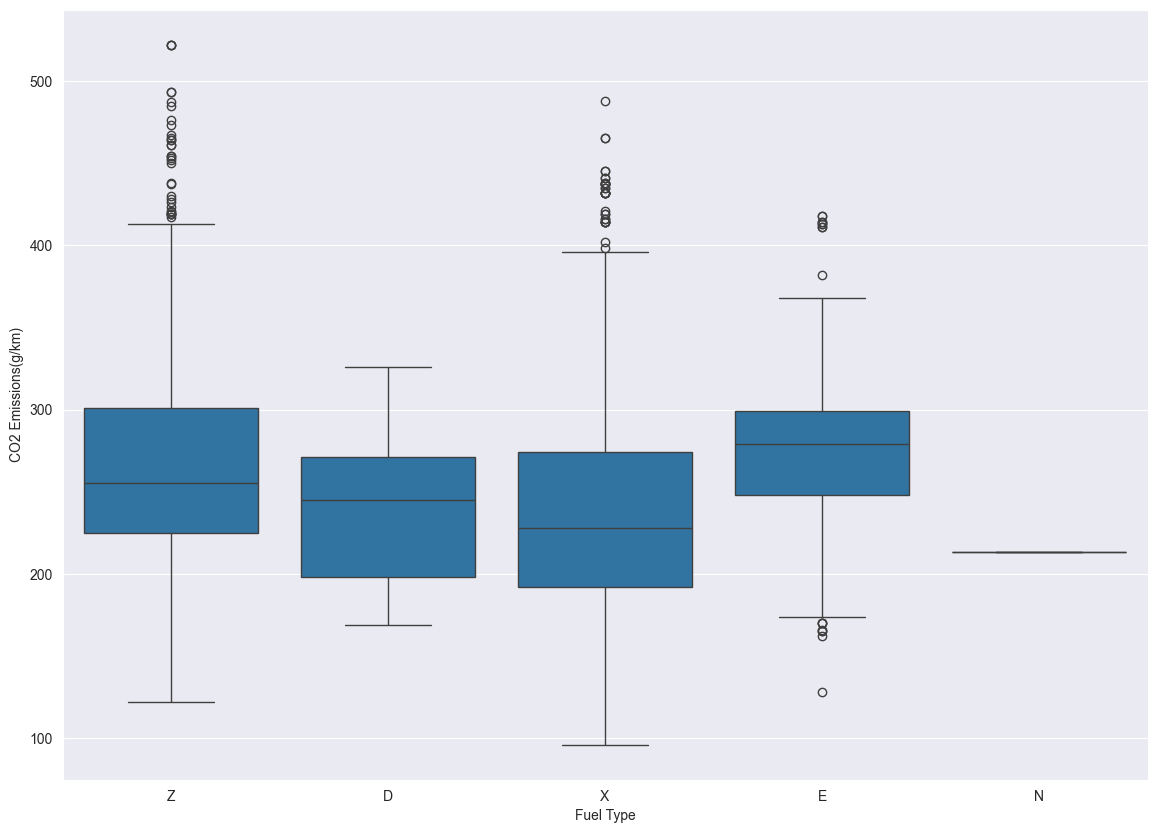

In [50]:
plt.figure(figsize=(14,10))
sns.boxplot(data=df, x='Fuel Type', y='CO2 Emissions(g/km)')
plt.show()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [52]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [53]:
from scipy.stats import ttest_ind

# Розділення даних на дві групи за категоріальною змінною
group1 = df[df['Make'] == 'MERCEDES-BENZ']['CO2 Emissions(g/km)']
group2 = df[df['Make'] == 'BMW']['CO2 Emissions(g/km)']

# Виконання t-тесту
t_stat, p_value = ttest_ind(group1, group2)

# Вивід результатів
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


t-statistic: 7.1588069359674416
p-value: 1.6348528649838809e-12


In [54]:
from itertools import combinations
from scipy.stats import ttest_ind

def plot_ttest(df, x, y):
    unique_models = df[y].unique()
    model_combinations = combinations(unique_models, 2)
    
    for combination in model_combinations:
        group1 = df[df[y] == combination[0]][x]
        group2 = df[df[y] == combination[1]][x]
        
        t_stat, p_value = ttest_ind(group1, group2)
        
        print(f"Model combination: {combination}")
        print(f"t-statistic: {t_stat}")
        print(f"p-value: {p_value}\n")

x = 'CO2 Emissions(g/km)'
y = 'Make'

plot_ttest(df, x, y)

group1 = df[df['Make'] == 'MERCEDES-BENZ']['CO2 Emissions(g/km)']

Model combination: ('ACURA', 'ALFA ROMEO')
t-statistic: -0.1895944735566826
p-value: 0.8500112207767989

Model combination: ('ACURA', 'ASTON MARTIN')
t-statistic: -20.289767329005837
p-value: 4.004526635183685e-40

Model combination: ('ACURA', 'AUDI')
t-statistic: -4.823951760957997
p-value: 2.090435090175867e-06

Model combination: ('ACURA', 'BENTLEY')
t-statistic: -22.22240121085202
p-value: 1.2881680146673884e-43

Model combination: ('ACURA', 'BMW')
t-statistic: -5.66301806310086
p-value: 2.3132852516899747e-08

Model combination: ('ACURA', 'BUICK')
t-statistic: -1.9781590983548245
p-value: 0.049498468778142575

Model combination: ('ACURA', 'CADILLAC')
t-statistic: -7.946626586357999
p-value: 8.775052636097023e-14

Model combination: ('ACURA', 'CHEVROLET')
t-statistic: -5.259429539168731
p-value: 1.9566668634004559e-07

Model combination: ('ACURA', 'CHRYSLER')
t-statistic: -5.308920277451093
p-value: 3.6825946853723924e-07

Model combination: ('ACURA', 'DODGE')
t-statistic: -9.34030

G:\Ilya\ML\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Model combination: ('AUDI', 'SRT')
t-statistic: -4.274096001937115
p-value: 2.617154831650529e-05

Model combination: ('AUDI', 'SUBARU')
t-statistic: 7.763311102993277
p-value: 6.263056434856123e-14

Model combination: ('AUDI', 'TOYOTA')
t-statistic: 5.397161721651183
p-value: 9.682723759522614e-08

Model combination: ('AUDI', 'VOLKSWAGEN')
t-statistic: 11.133922056072883
p-value: 8.939993423559809e-26

Model combination: ('AUDI', 'VOLVO')
t-statistic: 4.834795373887373
p-value: 1.8912643560400074e-06

Model combination: ('AUDI', 'GENESIS')
t-statistic: -3.679526208496988
p-value: 0.0002755994825887159

Model combination: ('AUDI', 'BUGATTI')
t-statistic: -10.274198345257936
p-value: 2.7195702458803086e-21

Model combination: ('BENTLEY', 'BMW')
t-statistic: 16.14229114920319
p-value: 1.4512361089831052e-48

Model combination: ('BENTLEY', 'BUICK')
t-statistic: 20.977009451738635
p-value: 4.788365577008788e-46

Model combination: ('BENTLEY', 'CADILLAC')
t-statistic: 14.304124081674122
p-v

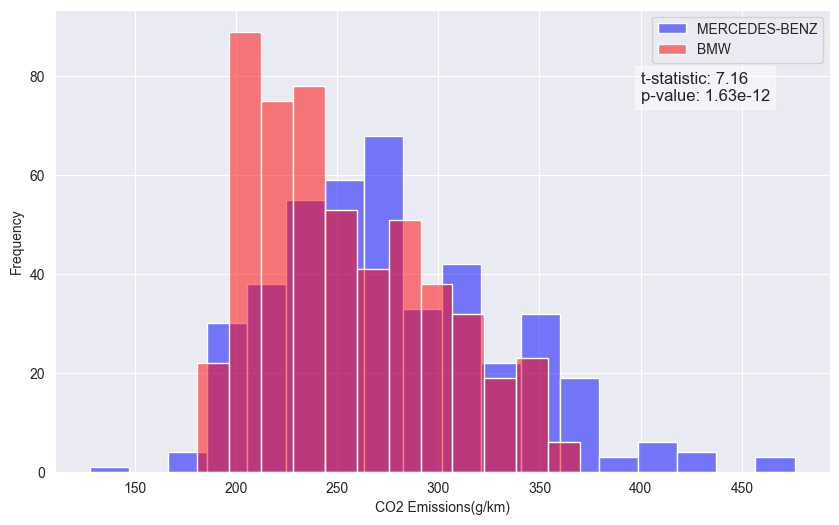

In [101]:
group1 = df[df['Make'] == 'MERCEDES-BENZ']['CO2 Emissions(g/km)']
group2 = df[df['Make'] == 'BMW']['CO2 Emissions(g/km)']
t_stat, p_value = ttest_ind(group1, group2)
plt.figure(figsize=(10, 6))
sns.histplot(group1, color='blue', alpha=0.5, label='MERCEDES-BENZ')
sns.histplot(group2, color='red', alpha=0.5, label='BMW')
plt.legend()
plt.xlabel('CO2 Emissions(g/km)')
plt.ylabel('Frequency')
plt.text(400, 75, f"t-statistic: {t_stat:.2f}\np-value: {p_value:.2e}", fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

In [56]:
unique_makes = df['Make'].unique()
for make in unique_makes:
    models_for_make = df[df['Make'] == make]['Model'].unique()
    print(f"Make: {make}, Models: {models_for_make}")


Make: ACURA, Models: ['ILX' 'ILX HYBRID' 'MDX 4WD' 'RDX AWD' 'RLX' 'TL' 'TL AWD' 'TSX'
 'MDX SH-AWD' 'RLX HYBRID' 'TLX' 'TLX SH-AWD' 'MDX SH-AWD ELITE'
 'MDX HYBRID AWD' 'NSX' 'TLX A-SPEC' 'TLX SH-AWD A-SPEC'
 'MDX SH-AWD A-SPEC' 'MDX Hybrid AWD' 'RDX AWD A-SPEC' 'RLX Hybrid'
 'TLX SH-AWD A-SPEC/Limited Edition']
Make: ALFA ROMEO, Models: ['4C' '4C SPIDER' 'GIULIA' 'GIULIA AWD' 'GIULIA QUADRIFOGLIO' '4C COUPE'
 'STELVIO AWD' 'STELVIO QUADRIFOGLIO' '4C Coupe' '4C Spider' 'Giulia'
 'Giulia AWD' 'Giulia Quadrifoglio' 'Stelvio' 'Stelvio AWD'
 'Stelvio AWD Quadrifoglio']
Make: ASTON MARTIN, Models: ['DB9' 'RAPIDE' 'V8 VANTAGE' 'V8 VANTAGE S' 'VANQUISH' 'RAPIDE S'
 'V12 VANTAGE S' 'VANTAGE GT' 'DB9 GT' 'DB11 V12' 'DB11 V8' 'DB11 AMR'
 'DBS Superleggera' 'Rapide AMR' 'Vanquish Zagato' 'Vantage V8']
Make: AUDI, Models: ['A4' 'A4 QUATTRO' 'A5 CABRIOLET QUATTRO' 'A5 QUATTRO' 'A6 QUATTRO'
 'A6 QUATTRO TDI (modified)' 'A7 QUATTRO' 'A7 QUATTRO TDI (modified)' 'A8'
 'A8 TDI (modified)' 'A8L' 'A8L TD

In [86]:
unique_makes = df['Fuel Type'].unique()
for make in unique_makes:
    models_for_make = df[df['Fuel Type'] == make]['Transmission'].unique()
    print(f"Make: {make}, Models: {models_for_make}")

Make: Z, Models: ['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 'A7' 'A8' 'M7' 'A5'
 'AS7' 'AV' 'AS9' 'AV6' 'M5' 'AM5' 'AM8' 'A9' 'AM9' 'AS10' 'A10' 'AV10']
Make: D, Models: ['AS8' 'A8' 'AS6' 'AS7' 'A6' 'M6' 'AM6' 'A9' 'AS10' 'A10']
Make: X, Models: ['A6' 'AS6' 'AS8' 'M6' 'A4' 'M5' 'AV' 'A8' 'A5' 'AM6' 'AV7' 'A9' 'AV6'
 'AS5' 'AS4' 'AS9' 'AM7' 'AS10' 'AS7' 'AV8' 'AV10' 'A10']
Make: E, Models: ['AS6' 'A6' 'A4' 'A8' 'A5' 'M5' 'AS8' 'AS7' 'A9' 'AM6' 'AS10']
Make: N, Models: ['AS6']


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [81]:
df['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [82]:
df['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

ValueError: No objects to concatenate

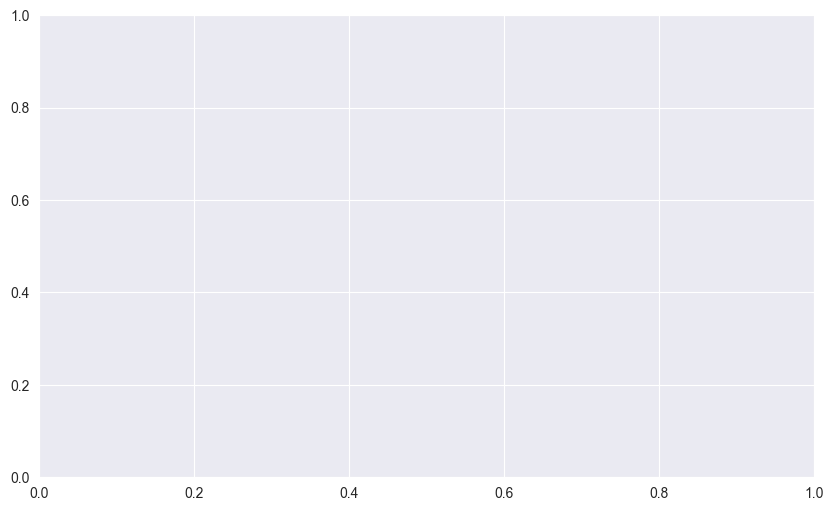

In [85]:
selected_make = "AV7"
selected_model = "Z"
selected_data = df[(df['Fuel Type'] == selected_make) & (df['Transmission'] == selected_model)]

plt.figure(figsize=(10, 6))
sns.histplot(data=selected_data, x='Fuel Type', hue='Transmission', multiple='stack')
plt.title(f'2D Distribution for Make: {selected_make} and Model: {selected_model}')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

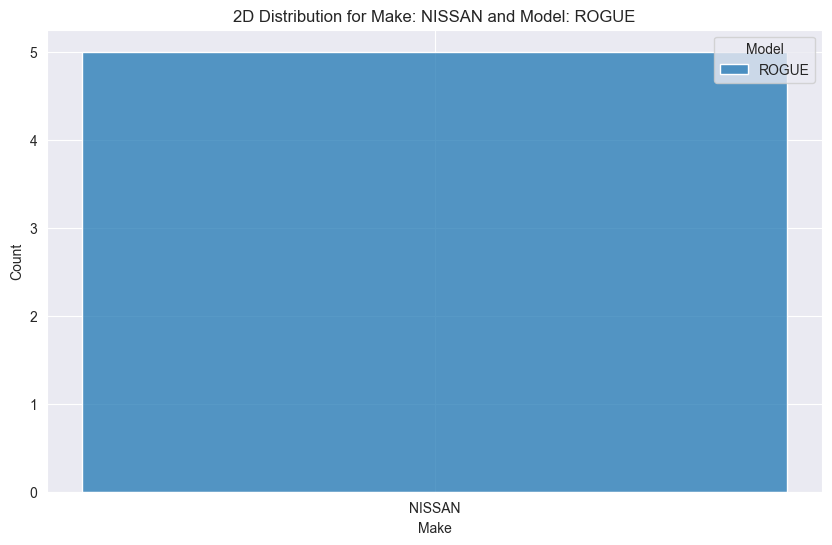

In [57]:
selected_make = "NISSAN"
selected_model = "ROGUE"
selected_data = df[(df['Make'] == selected_make) & (df['Model'] == selected_model)]

plt.figure(figsize=(10, 6))
sns.histplot(data=selected_data, x='Make', hue='Model', multiple='stack')
plt.title(f'2D Distribution for Make: {selected_make} and Model: {selected_model}')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

In [58]:
from scipy.stats import chi2_contingency

cross_tab = pd.crosstab(selected_data['Make'], selected_data['Model'])

chi2, p_value, _, _ = chi2_contingency(cross_tab)

print(f'χ² statistic: {chi2}')
print(f'p-value: {p_value}')


χ² statistic: 0.0
p-value: 1.0


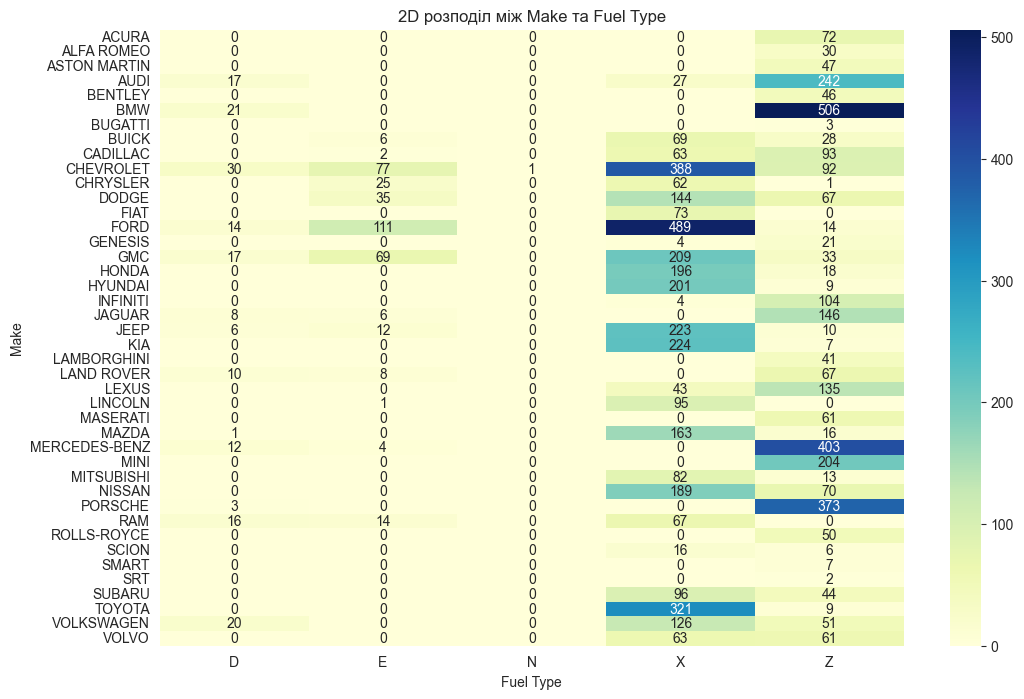

χ² statistic: 6076.087970237664
p-value: 0.0
Відкидаємо нульову гіпотезу: між Make та Model існує статистично значущий взаємозв'язок.


In [88]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Побудова 2D розподілу
make_model_cross = pd.crosstab(df['Make'], df['Fuel Type'])

# Візуалізація 2D розподілу
plt.figure(figsize=(12, 8))
sns.heatmap(make_model_cross, cmap="YlGnBu", annot=True, fmt="d")
plt.title("2D розподіл між Make та Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Make")
plt.show()

# Формулювання гіпотези
# Нульова гіпотеза: Make та Model незалежні одне від одного.
# Альтернативна гіпотеза: Між Make та Model є статистично значущий взаємозв'язок.

# Проведення χ² тесту
chi2, p_val, _, _ = chi2_contingency(make_model_cross)

# Інтерпретація результатів
alpha = 0.05
print(f"χ² statistic: {chi2}")
print(f"p-value: {p_val}")

if p_val < alpha:
    print("Відкидаємо нульову гіпотезу: між Make та Model існує статистично значущий взаємозв'язок.")
else:
    print("Не відкидаємо нульову гіпотезу: немає статистично значущого взаємозв'язку між Make та Model.")
